# Análise exploratória de dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [2]:
df = pd.read_csv('../data/raw/data.csv')
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 2. Descrição dos dados

[Titanic - Machine Learning From Disaster](https://www.kaggle.com/c/titanic/overview) é um conjunto de dados com informações referentes a vítimas do naufrágio do navio Titanic, tais como idade, sexo, classe do passegeiro, entre outras.
A partir de tal conjunto de dados é possível explorar as condições dos passageiros do navio e fazer observações sobre suas probabilidades de sobrevivência, sendo `survived` a variável dependente, e as outras são utilizadas como variáveis preditoras.

> A partir da tabela na seção 1, percebe-se que há 891 instâncias no conjunto de dados, ou seja, há informações sobre 891 passageiros do Titanic.

### 2.1 Dicionário de dados

In [3]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Indica se a pessoa sobreviveu ou não,qualitativa,nominal
1,pclass,Classe do passageiro no navio,qualitativa,ordinal
2,sex,Sexo do passageiro,qualitativa,nominal
3,age,Idade do passageiro,quantitativa,contínua
4,sibsp,Quantidade de irmãos ou cônjuges a bordo do navio,quantitativa,discreta
5,parch,Quantidade de pais ou filhos a bordo do navio,quantitativa,discreta
6,fare,Valor da tarifa do passageiro,quantitativa,contínua
7,embarked,Porto de embarcação do passageiro,qualitativa,nominal
8,class,Classe do passageiro no navio,qualitativa,ordinal
9,who,"Indica se é homem, mulher ou criança",qualitativa,nominal


> São 15 variáveis, onde 8 são qualitativas nominais, 3 qualitativas ordinais, 2 quantitativas contínuas e 2 quantitativas discretas.

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes? Se sim, quantos e em quais variáveis?
- Qual a distribuição dos dados?
- Existe alguma relação entre a classe do passageiro, o valor da tarifa que pagou e a sua sobrevivência?
- Existe alguma relção entre o sexo do passageiro, a idade e a sua sobrevivência?
- Existe alguma relação entre a classe do passageiro, a idade e sua sobrevivência?

### Existem dados faltantes? Se sim, em quais variáveis?

In [4]:
print(df.isna().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


----------
Percebemos que há dados faltantes em apenas quatro variáveis: **age**, **embarked**, **deck** e **embark_town**, com dados faltando respectivamente em **177**,**2**, **688** e **2** instâncias.

Iremos eliminar as linhas com dados faltantes para idade, pois tal variável é abordada nas perguntas de partida. Logo, utilizaremos apenas as instâncias com dados de nosso interesse.

----------

In [5]:
df.dropna(subset=['age'], inplace=True)
display(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> Após eliminar as linhas desinteressantes, restam 714 linhas da base de dados para estudo.

### Qual a distribuição dos dados?

In [6]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,714.000000,714.000000,714,714.000000,714.000000,714.000000,714.000000,712,714,714,714,184,712,714,714
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,453,NaN,NaN,NaN,NaN,554,355,413,413,51,554,424,404
mean,0.406162,2.236695,NaN,29.699118,0.512605,0.431373,34.694514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.491460,0.838250,NaN,14.526497,0.929783,0.853289,52.918930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,1.000000,NaN,20.125000,0.000000,0.000000,8.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,2.000000,NaN,28.000000,0.000000,0.000000,15.741700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,1.000000,33.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-----
- A maioria das pessoas não sobreviveu.
- Os passageiros eram predominantemente homens.
- O passageiro mais velho tinha 80 anos.
- A maioria dos passageiros embarcou na cidade de Southampton.
- A maioria dos passageiros eram da terceira classe.
- O intervalo de valores pagos pela passagem é 0 e 512.3 libras.
- O máximo de membros da mesma família viajando juntos (incluindo cônjuges) eram 6 pessoas.
- A maioria das pessoas viajou sozinha.

-----

#### Distribuição das variáveis qualitativas

In [7]:
def create_fig(tipo, subtipo, rows, cols, size):
    variaveis = dicionario.query(f"tipo == '{tipo}' and subtipo == '{subtipo}'").variavel.to_list()
    fig, axes = plt.subplots(rows, cols, figsize=size)
    plt.tight_layout(pad=4, w_pad=5, h_pad=5)
    fig.suptitle(f"Distribuição de variáveis {tipo}s - {subtipo}", fontweight="bold")
    for i, variavel in enumerate(variaveis):
        order = df[variavel].value_counts().index
        ax = sns.countplot(
            data=df,
            x=variavel,
            ax=axes.flatten()[i],
            color=colors[0],
            alpha=0.9,
            order=order
        )
        ax.bar_label(
            ax.containers[0],
            fmt="%.0f",
            label_type="center",
            color="white"
        )
        ax.set(frame_on=False)
        ax.axhline(0, color="k", clip_on=False)
        ax.set_title(f"Distribuição da variável '{variavel}'")
        ax.set_ylabel("Quantidade")
        ax.grid(axis='y', linestyle='-')
    fig.show()

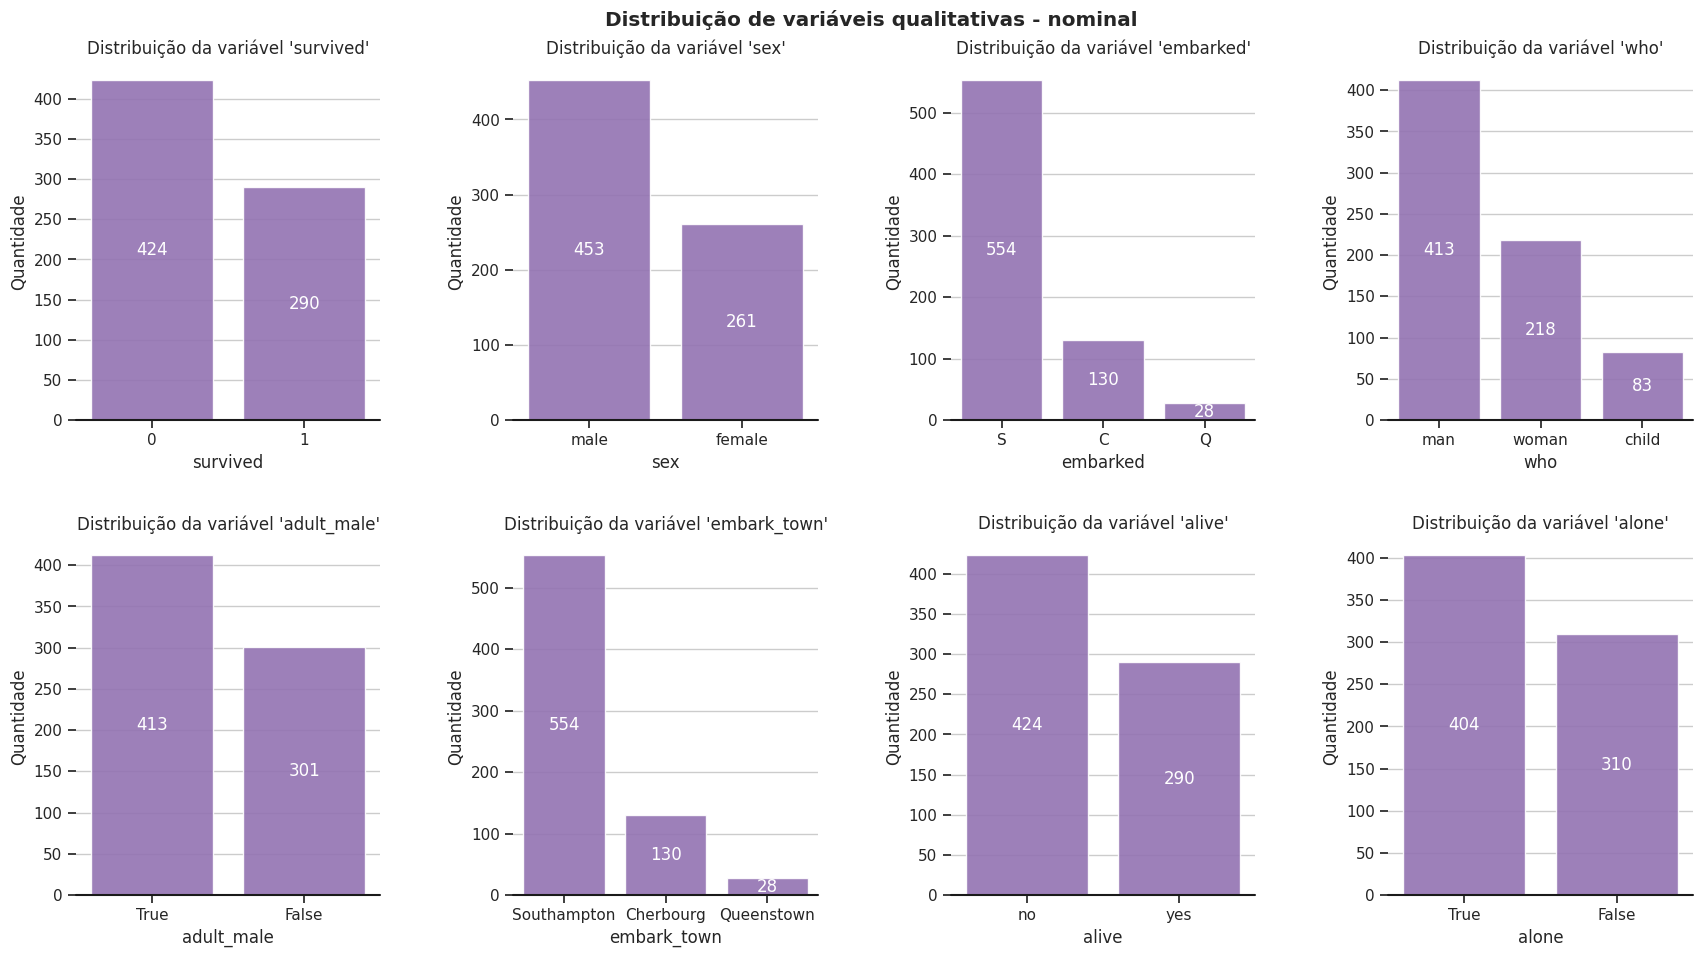

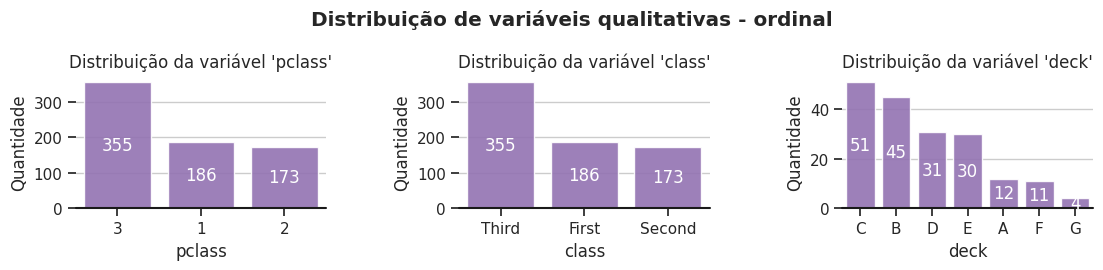

In [8]:
create_fig("qualitativa", "nominal", 2, 4, (18, 10))
create_fig("qualitativa", "ordinal", 1, 3, (12, 3))

----
- A maioria dos passageiros eram do sexo masculino, dos quais uma pequena parte eram crianças.
- A maioria das pessoas embarcou na cidade de Southampton, enquanto a minoria embarcou em Queenstown.
- Haviam mais passageiros na terceira classe do navio, seguidos pela primeira e segunda classes.

----

#### Distribuição das variáveis quantitativas

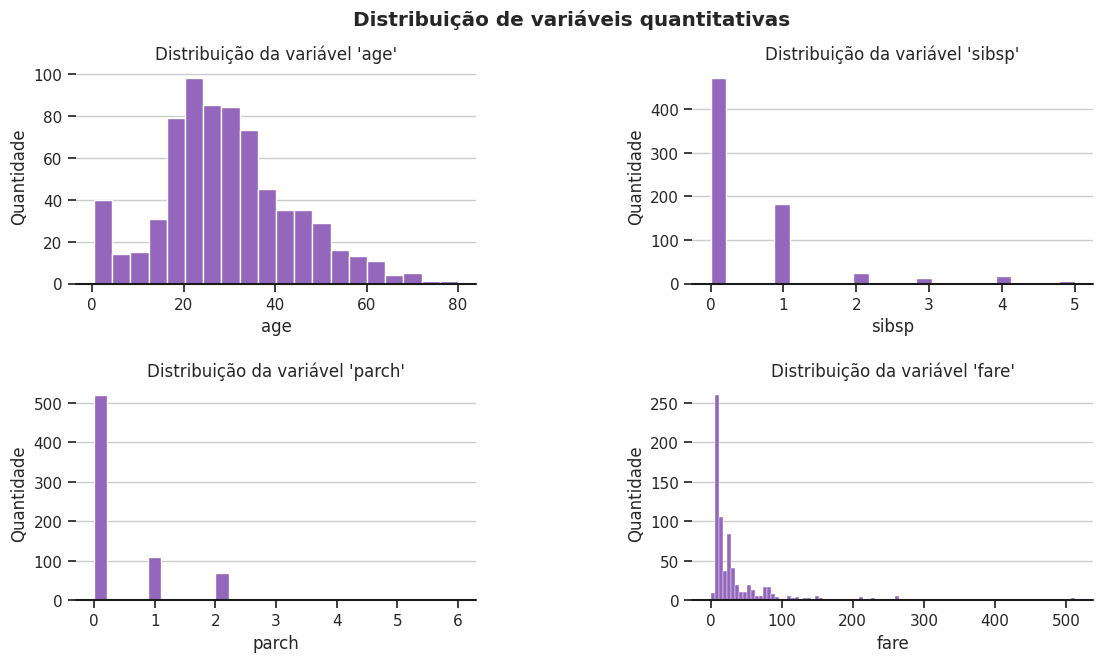

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
plt.tight_layout(pad=4, w_pad=10, h_pad=4)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=1,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

plt.show()

----
- A frequência maior de idade dos passageiros ocorre entre 20 e 40 anos.
- A quantidade de pessoas que viajavam com familiares é muito inferior à quantidade de pessoas que viajavam sozinhas.
- A moda do valor da tarifa paga pelos passageiros se encontra em um valor inferior a 50, indicando a grande quantidade de pessoas na terceira classe do Titanic.

----

### Existe alguma relação entre a classe do passageiro, o valor da tarifa que pagou e a sua sobrevivência?

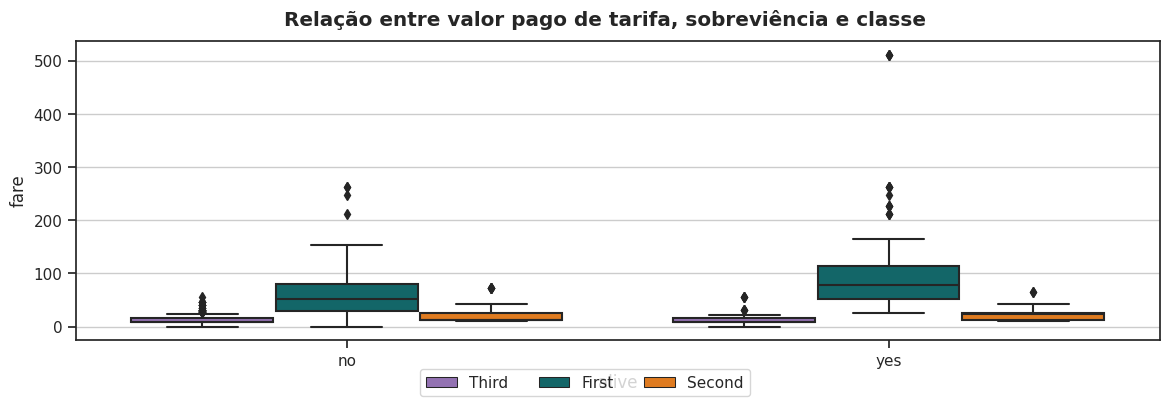

In [16]:
fig, axes = plt.subplots(1, 1, figsize=(12,4))
plt.tight_layout(pad=2, w_pad=5, h_pad=8)
fig.suptitle('Relação entre valor pago de tarifa, sobreviência e classe', fontweight='bold')

ax = sns.boxplot(
    x="alive", 
    y="fare", 
    hue="class", 
    data=df
)
handles, labels = plt.gca().get_legend_handles_labels()
ax.grid(axis='y', linestyle='-')
ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

----
- 75% das pessoas da primeira classe que pagaram até pouco mais de 100 libras sobreviveram.
- A pessoa que pagou o valor mais alto de tarifa sobreviveu.
- 75% das pessoas da terceira classe que pagaram até aproximadamente 25 libras não sobreviveram.
- 50% das pessoas de segunda classe que pagaram até pouco mais de 25 libras sobreviveram.
----

### Existe alguma relção entre o sexo do passageiro, a idade e a sua sobrevivência?

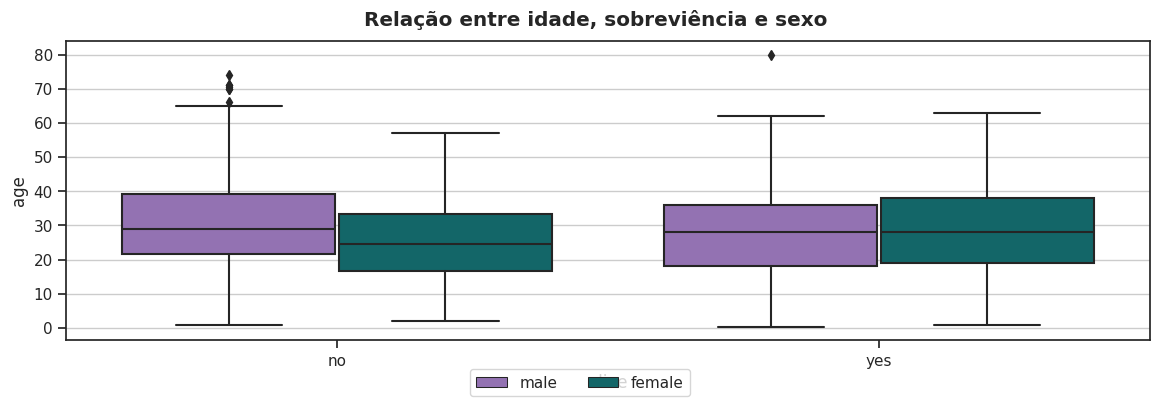

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(12,4))
plt.tight_layout(pad=2, w_pad=5, h_pad=8)
fig.suptitle('Relação entre idade, sobreviência e sexo', fontweight='bold')

ax = sns.boxplot(
    x="alive", 
    y="age", 
    hue="sex", 
    data=df,
    ax= axes
)
handles, labels = plt.gca().get_legend_handles_labels()
ax.grid(axis='y', linestyle='-')
ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=2)
plt.show()

----
- O passageiro mais velho sobreviveu.
- 75% de pessoas do sexo feminino de até pouco menos de 40 anos sobreviveram.
- O passageiro mais jovem era do sexo masculino, e ele sobreviveu.
- Pessoas do sexo masculino com mais chance de sobreviver eram mais jovens do que as pessoas de sexo feminino.
----

### Existe alguma relação entre a classe do passageiro, a idade e sua sobrevivência?

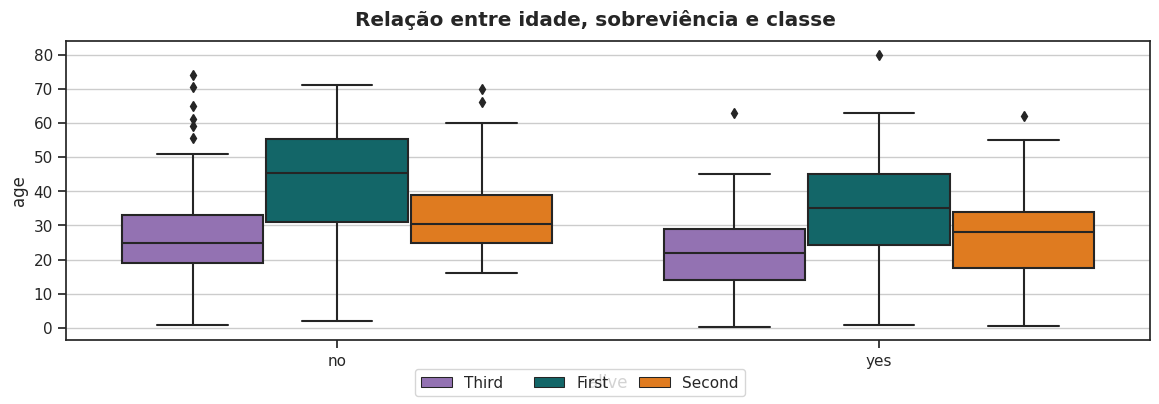

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(12,4))
plt.tight_layout(pad=2, w_pad=5, h_pad=8)
fig.suptitle('Relação entre idade, sobreviência e classe', fontweight='bold')

ax = sns.boxplot(
    x="alive", 
    y="age", 
    hue="class", 
    data=df
)
handles, labels = plt.gca().get_legend_handles_labels()
ax.grid(axis='y', linestyle='-')
ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

----
- 50% das pessoas da terceira classe que não sobreviveram tinham até 25 anos.
- A maioria das pessoas da terceira classe eram de faixa etária mais jovem do que as pessoas de primeira e segunda classe.
- A pessoa mais jovem sobreviveu e era da terceira classe.
- A pessoa mais velha sobreviveu e era da primeira classe.
----

## 4. Insights

## 5. Observação
Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.